0.0003929312473424969


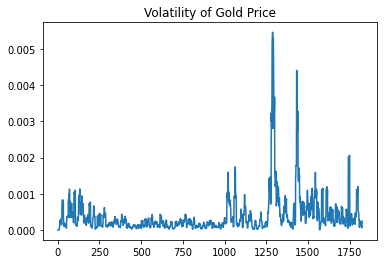

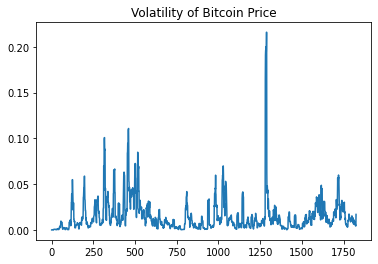

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_volatility.xlsx')
u_gold = df['u_gold'].values
u_bitcoin = df['u_bitcoin'].values

def cal_volatility1(price):
    n = len(price)
    u = np.zeros(n)
    sigma = np.zeros(n)
    temp = 0
    M = 10
    for i in range(n-M):
        t = i + M
        

    # m = 0
    for i in range(n-2):
        for m in range(M):
            m+=1
            u[i+1] =( price[i+1] - price[i])/price[i]
            # print(temp, u[i+1])
            if not np.isnan(u[i+1]):
                temp += u[i+1] ** 2
                sigma[i+2] = np.sqrt(temp/m)
            else:
                # print('nan')
                m -= 1
                sigma[i+2] = sigma[i+1]
        
    return sigma, u

def cal_volatility_with_u(u, m=10):
    n = len(u)
    v = np.zeros(n)
    for i in range(n - m):
        t = i + m
        v[t] = np.sum(np.square(u[i:t-1]))
    return v

sigma_gold = cal_volatility_with_u(u_gold)
sigma_bitcoin = cal_volatility_with_u(u_bitcoin)
print(np.mean(sigma_gold))
plt.plot(sigma_gold)
plt.title('Volatility of Gold Price')
plt.show()
plt.plot(sigma_bitcoin)
plt.title('Volatility of Bitcoin Price')
plt.show()


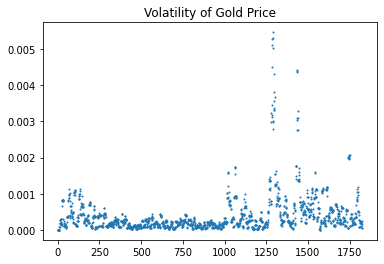

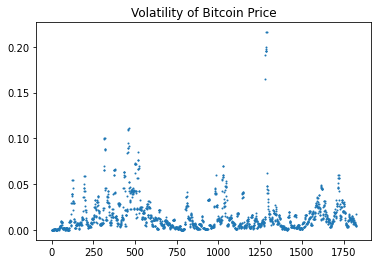

In [12]:
plt.scatter(range(len(sigma_gold)),sigma_gold,s=1)
plt.title('Volatility of Gold Price')
plt.show()
plt.scatter(range(len(sigma_gold)),sigma_bitcoin,s=1)
plt.title('Volatility of Bitcoin Price')
plt.show()

In [13]:
df['sigma_gold'] = sigma_gold
df['sigma_bitcoin'] = sigma_bitcoin
df.to_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_volatility_new.xlsx')